**Last Update**: Dec 2023 by Noa Mills <br />
**Jupyter Notebook**: [Tutorial1_Image_Processing_Essentials_Boucheron.ipynb](https://geospatial.101workbook.org/tutorials/Tutorial1_Image_Processing_Essentials_Boucheron.ipynb)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ISUgenomics/geospatialworkbook/HEAD?filepath=tutorials)

# Image Processing Fundamentals

This tutorial was modified from the 2020 AI Workshop which itself was modifed from tutorials given by Laura E. Boucheron, Electrical & Computer Engineering, NMSU

> Copyright (C) 2020  Laura E. Boucheron
> 
> This information is free; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 3 of the License, or (at your option) any later version.
> 
> This work is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
> 
> You should have received a copy of the GNU General Public License along with this work in a file `COPYING.TXT`; if not, see <https://www.gnu.org/licenses/>.
> 

## Overview

In this tutorial, we present a brief overview of image processing concepts necessary to understand machine learning and deep learning.  Completion of this tutorial should give participants the basic background and terminology necessary for an understanding of the basics of image processing and the common manipulations of images used for machine learning and deep learning.

A jupyter notebook is made available so you can interactively work through the tutorial. If you haven't already, see [Introduction to Jupyter Notebook] and return after you are done.

* [Tutorial1_Image_Processing_Essentials_Boucheron.ipynb](https://geospatial.101workbook.org/tutorials/Tutorial1_Image_Processing_Essentials_Boucheron.ipynb)

This tutorial contains 5 sections:
  - **Section 0: Preliminaries**: some notes on using this notebook and how to download the two images that we will use for this tutorial
  - **Section 1: Working with Grayscale Images**: how to read, query characteristics, intepret, and display grayscale images
  - **Section 2: Working with Color Images**: how to read, query characteristics, interpret, and display color images
  - **Section 3: Transforming Images**: how to convert between grayscale and color images, how to rescale the spatial dimensions of an image through cropping and resizing, and other geometric transformations
  - **Section 4: Filtering Images**: the basics of filtering images through convolution with a filter kernel
  
There are subsections with the heading **<span style='color:Green'> Your turn: </span>** throughout this tutorial in which you will be asked to apply what you have learned.

# Section 1: Preliminaries 

## Section 0.1 A reminder on Jupyter Notebooks

There are two main types of cells in this notebook: code and markdown (text).  You can add a new cell with the plus sign in the menu bar above and you can change the type of cell with the dropdown menu in the menu bar above.  As you complete this tutorial, you may wish to add additional code cells to try out your own code and markdown cells to add your own comments or notes. 

Markdown cells can be augmented with a number of text formatting features, including
  - bulleted
  - lists

embedded $\LaTeX$, monotype specification of `code syntax`, **bold font**, and *italic font*.  There are many other features of markdown cells--see the jupyter documentation for more information.

You can edit a cell by double clicking on it.  If you double click on this cell, you can see how to implement the various formatting referenced above.  Code cells can be run and markdown cells can be formatted using Shift+Enter or by selecting the Run button in the toolbar above.

Once you have completed (all or part) of this notebook, you can share your results with colleagues by sending them the `.ipynb` file.  Your colleagues can then open the file and will see your markdown and code cells as well as any results that were printed or displayed at the time you saved the notebook.  If you prefer to send a notebook without results displayed (like this notebook appeared when you downloaded it), you can select ("Restart & Clear Output") from the Kernel menu above.  You can also export this notebook in a non-executable form, e.g., `.pdf` through the File, Download As or File, Export Notebook as menu.

## Section 0.2a Set Up your Computing Environment

This tutorial can either be run on a local machine, or on Atlas. We recommend that you pull up the ["view-able" version of this notebook](https://geospatial.101workbook.org/IntroductionToImageAnalysis/Tutorial1_Image_Processing_Essentials_Boucheron.html) in your browser, and follow the instructions to set up the conda environment and your project directory before opening up this tutorial.

##### If Running on your local machine:

Ensure that you have either miniconda or anaconda installed. You can follow the instructions [here](https://docs.conda.io/projects/miniconda/en/latest/) to install miniconda. Open up the anaconda or miniconda terminal.

##### If Running on Atlas:

Connect to Atlas through the [Open OnDemand interface](https://atlas-ood.hpc.msstate.edu/). Open a terminal from inside JupyterLab (File > New > Terminal). Run the following command to load miniconda.

```bash
module load miniconda
```

### Create your Project Directory and Conda Environment

Navigate to the directory you wish to use for the image processing tutorial series. Run the following commands to create the directory `ImageProcessingSeries`, which will store all of the files needed to run all five tutorials in this series. Note that the creation of the conda environment should take 5-10 minutes.

```bash
mkdir ImageProcessingSeries
cd ImageProcessingSeries
mkdir Tutorial1 Tutorial2 Tutorial3 Tutorial4 Tutorial5
wget https://kerriegeil.github.io/NMSU-USDA-ARS-AI-Workshops/aiworkshop.yml
source activate
conda env create aiworkshop -f aiworkshop.yml
conda activate aiworkshop
python -m ipykernel install --user --name=aiworkshop
wget https://geospatial.101workbook.org/tutorials/Tutorial1_Image_Processing_Essentials_Boucheron.ipynb -P Tutorial1
```

Now, you can open up this tutorial from `ImageProcessingSeries/Tutorial1/Tutorial1_Image_Processing_Essentials_Boucheron.ipynb`. If you are running this tutorial on your local machine, run the command `jupyter notebook` in your terminal and navigate to the file. If you are running this tutorial on Atlas, you can create a symbolic link between your project directory and your home directory so you can navigate to the tutorial file within the Jupyter Labs navigation pane:

```bash
ln -s /path/to/ImageProcessingSeries ~
```

When the environment finishes building, open up the tutorial, and select this environment as your kernel in your Jupyter Notebook (click top right corner where you see Python 3, select your new kernel from the dropdown menu, click select).

##### Troubleshooting recommendations can be found [here](https://kerriegeil.github.io/NMSU-USDA-ARS-AI-Workshops/setup/).

## Section 0.2b Downloading Images
Next, we need to download images to work with in this tutorial.  In your terminal, navigate to `/path/to/ImageProcessingSeries/Tutorial1` and run the following commands. 

```bash
wget https://geospatial.101workbook.org/tutorials/data/cameraman.png
wget https://geospatial.101workbook.org/tutorials/data/peppers.png
```

Both of these images are common example images used in image processing and are often included as part of the distribution of image processing toolboxes.

|cameraman.png            |  peppers.png       |
:-------------------------:|:-------------------------:
<img src="https://geospatial.101workbook.org/tutorials/data/cameraman.png">   | <img src="https://geospatial.101workbook.org/tutorials/data/peppers.png">

Notice how the left image `cameraman.png` is in grayscale while the `peppers.png` is in color. This means the amount of information (bands) per region of picture is going to be different.   Sometimes you want to focus on certain features which is better rendered/analyzed in grayscale or in color. You may be reducing the datasize by converting the color image to grayscale, or mapping an important band (more on that later) to a color.

## Section 0.3 Import Necessary Libraries

First, we import necessary libraries:
  - We `import numpy as np` mostly out of habit since `numpy` contains many common mathematical and scientific functions
  - We import the `matplotlib` plotting library which provides many common plotting routines (including image visualization).  There are other plotting libraries, but `matplotlib` was designed to mimic much of the functionality of Matlab plotting and is thus very nice for those of us who transitioned from Matlab to python.
  - We use `%matplotlib inline` to specify that plots should occur inline in the notebook (rather than in external figure windows).  This is very convenient if you want a single document of your code and results.
  - We import the `imageio` library which provides functions to read common image formats.  We use imageio here since it returns images as an array.  We note that there are other powerful image libraries, including `PIL` / `pillow` which is used by the very nice `pandas` library for data manipulation.  We work with images as simple `nparrays` here since that best illustrates the basic image processing concepts.
  - We import two packages from scikit-image (`skimage`) which provides image manipulation functions
  - We import the `ndimage` package from `scipy` which provides image filtering functions

It would be best to run this next cell before the workshop starts to make sure you have all the necessary packages installed on your machine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import imageio
import skimage.color
import skimage.transform
import scipy.ndimage as ndimage

# Section 1: Working with Grayscale Images

## 1.1 Reading in the image
We can read in the images using the `imageio.imread` command.  We explicitly cast the image as an np array as this will give us access to some helpful characteristics of the image.  We begin with the grayscale `cameraman.png` image.

In [2]:
INFILE='data/cameraman.png'                    # path to image
I_camera = np.asarray(imageio.v2.imread(INFILE))  # load image and convert to array

## 1.2 Displaying the image
Let's display this image.  We use the `matplotlib` `imshow` command.

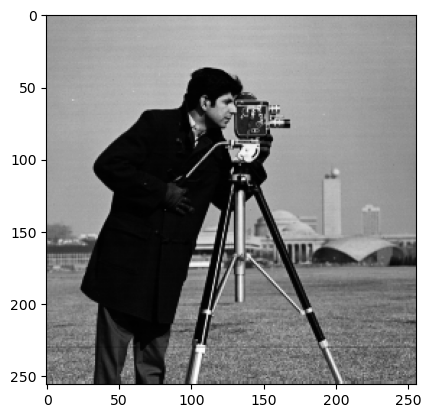

In [3]:
plt.figure()                      # open a new figure window
plt.imshow(I_camera, cmap='gray') # visualize the I_camera image with a grayscale colormap
plt.show()                        # show the plot

### A note about coordinate conventions

By default, axis labels are included which demarcate pixel counts.  You may notice that the origin of an image is interpreted as the **upper left** corner and not the lower left corner as you might have expected.  This is a consequence of the fact that we use standard linear algebra style indexing for images where pixel $(n,m)$ is indexed in row, column order.  For those of you who might be particularly concerned, this coordinate system still describes a right-handed system. 

This coordinate system can cause issues later on if you accidentally swap indices.  You might think you are looking in the upper right but are actually looking in the lower left.  You might think you are traversing left to right and are actually traversing up to down.

## 1.3 Changing display parameters
There are various choices in display that you can make, including:
  - scaling the figure window using `figsize=(x,y)` within the `plt.figure()` command.  In this, `x` and `y` are by default in units of inches. The concept of measuring the image in inches comes from printing standards, and doesn't apply very intuitively to computer graphics. An image that is defined as a given size in inches may render as larger on one screen and smaller on another since different screens have different resolutions. When the user specifies the dimensions of an image in inches, these dimensions are converted from inches to pixels. By default, matplotlib uses 72 pixels per square inch, though this value can be modified by the user. A reasonable choice for these values will depend on your computer's resolution and screen size. More information on figure size units can be found [here].(https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html).
  - scaling the size of the text labels with the command `plt.rcParams.update({'font.size': f})` where `f` is the font size you desire in units of pt, e.g., 20.  You need to run this only once to update the font size parameters, after which all subsequent figure windows will use this new font size. The "rc" in "rcParams" stands for runtime configuration, and the rcParams variable stores configuration variables in a dictionary-like datatype. You can find more information about runtime configurations for matplotlib [here](https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-dynamic-rc-settings).
  - removing all axis decorators (including ticks, tick labels, axis labels, etc.) with the command `plt.axis('off')`
  - adding axis labels or a title to your plot, e.g., `plt.xlabel('flamingos')`, `plt.ylabel('emus')`, `plt.title('Emus versus flamingos')`.  Note that if you have turned the axes off, your titles will not show up. You can verify this by commenting out the line `plt.axis('off')` and observing how it affects the output.

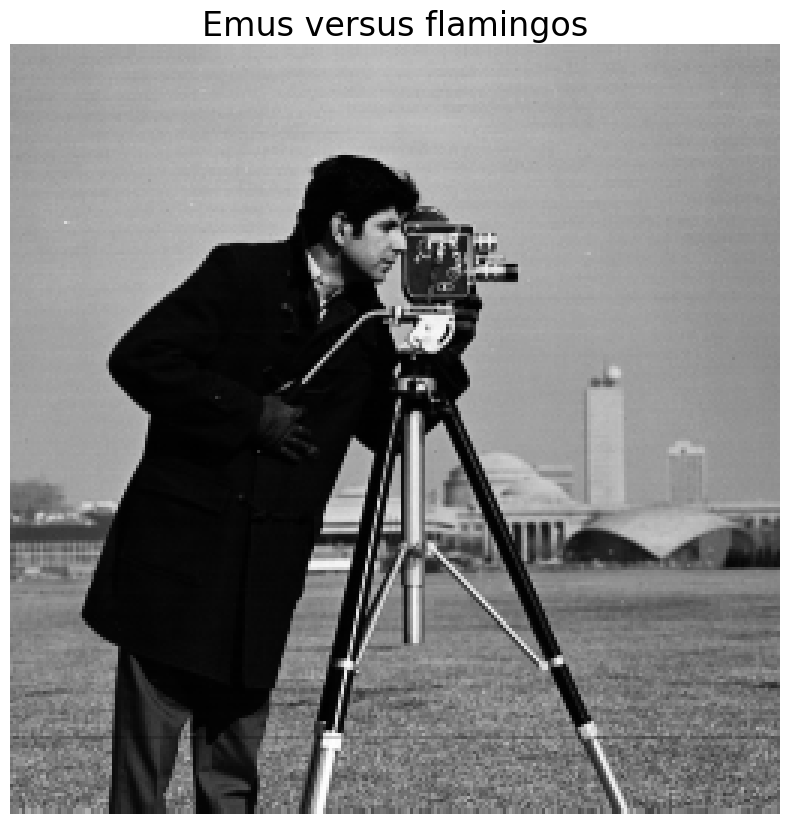

In [7]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))              # open a new figure window of size 10x10 (artbitrary units)
plt.imshow(I_camera, cmap='gray')        # visualize the I_camera image with a grayscale colormap
plt.axis('off')                          # turn off the axis decorators
plt.xlabel('flamingos')                  # provide a label for the x axis
plt.ylabel('emus')                       # provide a label for the y axis
plt.title('Emus versus flamingos')       # provide a title for the plot
plt.show()                               # show the plot

## <span style='color:Green'> Your turn:  </span>
Choose a figure size so that the image fills the width of your notebook and provide a descriptive title to your image.  You may also choose to label your axes or not, per your preference.  For what it's worth, image processing people don't tend to display axis labels. 

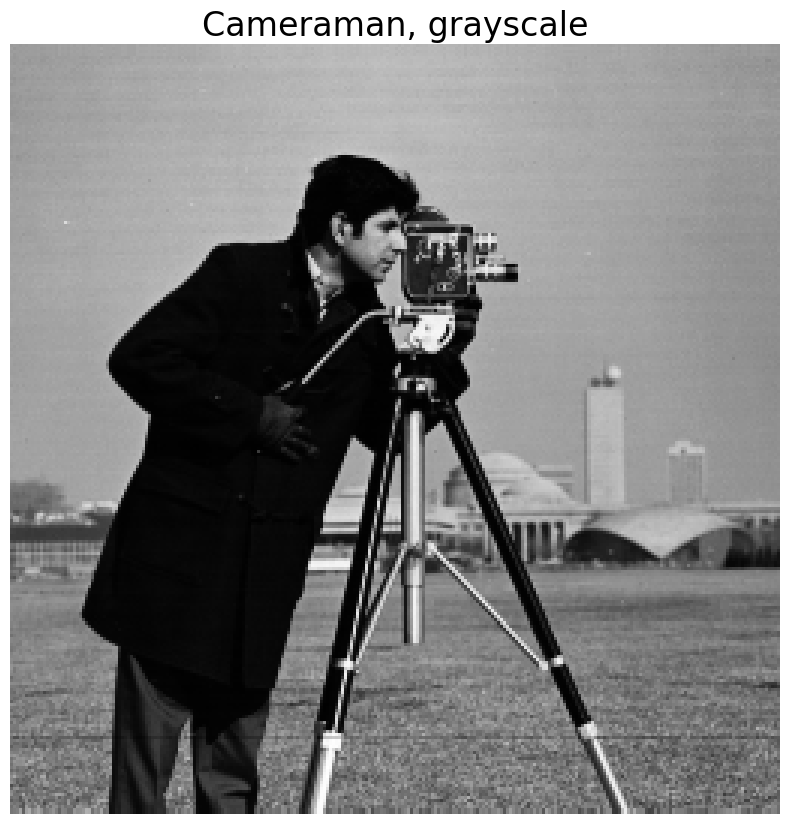

In [6]:
plt.figure(figsize=(10,10))           # open a new figure window of size 10x10 inches
plt.imshow(I_camera, 
           cmap='gray')     # visualize the I_camera image with a grayscale colormap
plt.axis('off') # turn off the axis decorators
plt.title('Cameraman, grayscale') # provide a title for the plot
plt.show() # show the plot

## 1.4 Printing Image Characteristics
We can check on important characteristics of `I_camera` using the `%whos` magic ipython command. `%whos` prints out all variables (data) defined so far. For those who are familiar with R, this is similar to RStudio's environment pane, or R's `ls()` command. Note--within some environments, including jupyter notebooks, you can drop the `%` althought it's probably best practice to get used to including it. To learn more please see [ipython %whos documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-whos)

### 1.4.1 Using the %whos command

In [17]:
# Print out each variable and type, similar to RStudio's environment panel
%whos
# Note - comments on the same line of the "%whos" command will interfere with the command's functioning

Variable   Type       Data/Info
-------------------------------
INFILE     str        data/cameraman.png
I_camera   ndarray    256x256: 65536 elems, type `uint8`, 65536 bytes
a          int        10
imageio    module     <module 'imageio' from '/<...>ges/imageio/__init__.py'>
ndimage    module     <module 'scipy.ndimage' f<...>ipy/ndimage/__init__.py'>
np         module     <module 'numpy' from '/pr<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
skimage    module     <module 'skimage' from '/<...>ges/skimage/__init__.py'>


### A note on common image variable types
We see that `I_camera` is an `ndarray` of size $256\times256$ pixels and of variable type `uint8` (unsigned 8-bit integer).  Remember that computers store data natively in binary (base-2) format.  The `uint8` variable type means we have 8 bits (the `'8'` in `uint8`) to represent a range of unsigned (the `'u'` in `uint8`) integers (the `'int'` in `uint8`). Note that the `'u'` in `uint8` stands for unsigned, meaning it is always positive as it cannot have a negative sign. It is very common that image pixels are represented as `uint8` variables, which also indicates that the pixels are within the range $[0,255]$ (since $2^0-1=0$ and $2^8-1=255$).  

Since there is only one color channel, i.e., `I_camera` is a 2D array $\in\mathbb{R}^{N\times M}$ rather than a 3D array $\in\mathbb{R}^{N\times M\times C}$ (more on that later), we also know that this is a grayscale image.

### 1.4.2 Printing the max and min values of an image
We can check for the actual maximum and minimum values of the image to find the darkest and lightest pixel values. If the image is the same shade, min will equal max.

In [18]:
print('The minimum value of I_camera is ' + str(I_camera.min()))
print('The maximum value of I_camera is ' + str(I_camera.max()))

The minimum value of I_camera is 7
The maximum value of I_camera is 253


### A note on image intensity conventions
We note that this ```I_camera``` image spans the range $[7,253]$.  In grayscale images, it is common interpretation that **darker pixels have smaller intensity values and lighter pixels have larger intensity values**.  

### 1.4.3 Printing a portion of the image
It is also important to remember that the computer "sees" only an array of values.  To reinforce this, we can "look" at what the computer "sees" in a portion of the image.

In [19]:
print(I_camera[100:110, 100:110])               # subregion that is 10 x 10 pixels          
I_camera_portion = I_camera[100:110, 100:110]

[[  9  11  13  11  11  11  16 106 178  68]
 [ 12  12  12  11  12  11  69 181  62  15]
 [ 13  12  12  11  12  82 168  60  14  13]
 [ 11  10   9  10  69 182  67  14  12  14]
 [ 10  10  10  71 200  81  15  12  14  14]
 [ 12  12  58 204  91  17  12  14  14  17]
 [ 11  46 201 106  18  14  16  15  16  16]
 [ 34 185 122  23  10  14  17  16  13  13]
 [186 135  30  11   9   9  10  10   9  10]
 [154  33  11  13  12   9   9   9   9  11]]


## <span style='color:Green'> Your turn:  </span>
What does this printout tell us about that part of the image?  

There is a "stripe" of light-valued pixels (large intensity values) oriented at approximately 45 degrees through this portion of the image. On either side of that bright stripe, the image is very dark.

### 1.4.4 Visualizing a portion of an image
We could use `plt.imshow` to display that small portion of the image.

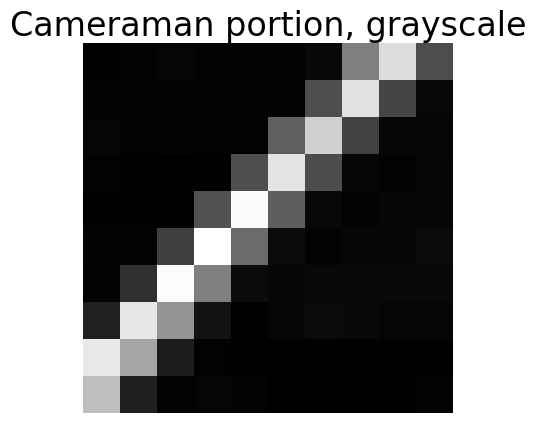

In [20]:
plt.figure()
plt.imshow(I_camera[100:110, 100:110], 
           cmap='gray')
plt.axis('off')
plt.title('Cameraman portion, grayscale') 
plt.show() 

## <span style='color:Green'> Your turn:  </span>
Does this display of the image verify your interpretation from the printout of the pixel values?

### 1.4.5 Another visualization of a portion of an image
Here, we maintain the display of the whole image, and plot a yellow box around the area that we've been discussing.  This can be a helpful visualization since it maintains the context of the box.

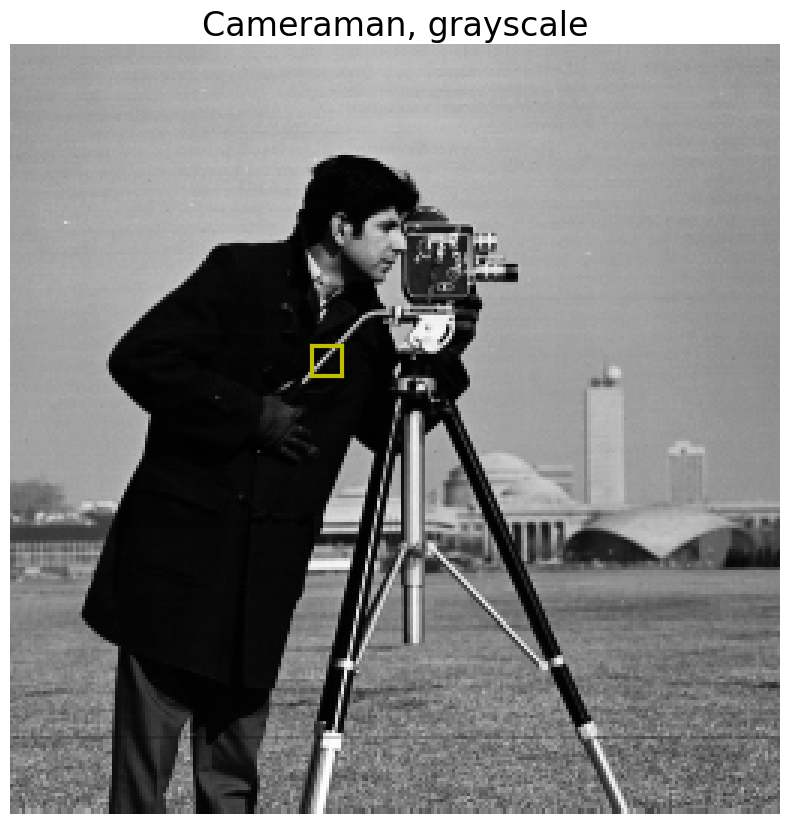

In [21]:
plt.figure(figsize=(10,10)) 
plt.imshow(I_camera, cmap='gray') 
plt.axis('off') 
plt.title('Cameraman, grayscale') 
plt.plot([100,100], [100,110], 'y-',linewidth=3)       # Draws the yellow rectangle
plt.plot([110,110], [100,110], 'y-',linewidth=3)
plt.plot([100,110], [100,100], 'y-',linewidth=3)
plt.plot([100,110], [110,110], 'y-',linewidth=3)
plt.show() 

## <span style='color:Green'> Your turn:  </span>
What happens if you plot the image using `imshow` but "forget" to specify the colormap as `gray`?

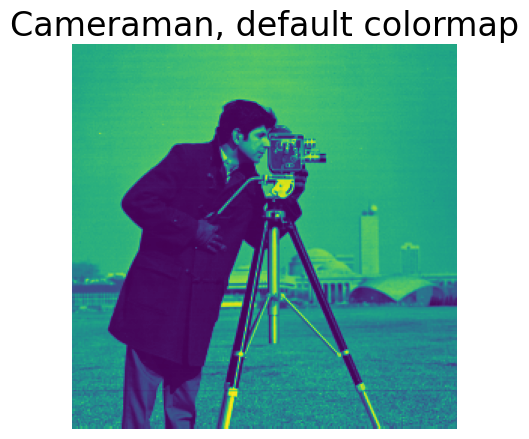

In [22]:
plt.figure(figsize=(5,5)) # open a new figure window of size 5x5 inches
plt.imshow(I_camera) # visualize the I_camera image with a grayscale colormap
plt.axis('off') # turn off the axis labels
plt.title('Cameraman, default colormap') # provide a title for the plot
plt.show() # show the plot

### A note on colormaps
You should have found that the grayscale image now appears colored.  How can that be if the image is a single channel, i.e., grayscale image?  In this case, python is applying the default colormap to the intensities.  In this default colormap, pixels with values closer to 0 appear dark blue, pixels with values in the middle appear green or blue, and pixels with values closer to 255 appear yellow. (Your computer may use a different default colormap in which case the colors noted above may not be correct). 

See [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) for a comprehensive list of available colormaps and examples.

There are also many other options for `plt.imshow`, see `help(plt.imshow)` for more details.

# Section 2: Working with Color Images

## 2.1 Reading in and displaying the image
Now, we turn to the color `peppers.png` image.  We use the same command to read in the image and the same basic commands to visualize the image.  The only difference here is that we allow python to choose a default colormap for this color image.

In [ ]:
I_pepper = np.asarray(imageio.imread('data/peppers.png'))
plt.figure(figsize=(5,5)) # open a new figure window of size 20x20 (artbitrary units)
plt.imshow(I_pepper) # visualize the I_pepper image with a default colormap
plt.axis('off') # turn off the axis labels
plt.title('Peppers, RGB') # provide a title for the plot
plt.show() # show the plot

## 2.2 Printing image characteristics
We can check on important characteristics of `I_pepper`.

### 2.2.1 The %whos command

In [ ]:
%whos

### A note on color channel conventions
We see that `I_pepper` is an `ndarray` of size $384\times512\times 3$ pixels and of variable type `uint8` (unsigned 8-bit integer).  We thus have a 3-channel image where the three channels are assumed to be a red (R), green (G), and blue (B) channel, i.e., an RGB image.  **By convention, the first channel is assumed to be R, the second G, and the third B.**

Again, we note that image pixels are represented as `uint8` variables.  In this case, however, each pixel is associated with 3 `uint8` values, resulting in $2^8 2^8 2^8=2^{24}=16,777,216$ unique colors.  **Colors which have equal contribution from R, G, and B are grayscale.**

### 2.2.2 Max and min values
We can check for the actual maximum and minimum values of the image or of the R, G, or B channels.

In [ ]:
print('Max and min values of the image:')          # Min and max across all channels
print('    Min: '+str(I_pepper.min()))
print('    Max: '+str(I_pepper.max()))
print('Max and min values of the red channel:')    # The zero [:,:,0] indices is R (red) channel
print('    Min: '+str(I_pepper[:,:,0].min()))
print('    Max: '+str(I_pepper[:,:,0].max()))
print('Max and min values of the green channel:')  # The one [:,:,1] indices is G (green) channel
print('    Min: '+str(I_pepper[:,:,1].min()))
print('    Max: '+str(I_pepper[:,:,1].max()))
print('Max and min values of the blue channel:')   # The two [:,:,2] indices is B (blue) channel
print('    Min: '+str(I_pepper[:,:,2].min()))
print('    Max: '+str(I_pepper[:,:,2].max()))

### A note on intensity conventions in color images
We note that this ```I_pepper``` image spans the range $[5,255]$ in R, $[1,255]$ in G, and $[0,255]$ in B.  We also note that when we didn't specify a color channel, python returned the max and min across the three color channels.

Extending the interpretation of a single channel image in which darker pixels have smaller intensity values and lighter pixels have larger intensity values, a color is defined as the contribution of R, G, and B, where larger intensities in those channels correspond to larger contribution from those colors.  

### 2.2.3 Printing a portion of the image
Since we have three color channels in this color image, we print out each of the color channels separately.

In [ ]:
print('Red:')
print(I_pepper[100:110,100:110,0])         # This is taking a similar 10 x 10 pixel portion
print('Green')
print(I_pepper[100:110,100:110,1])
print('Blue')
print(I_pepper[100:110,100:110,2])

## <span style='color:Green'> Your turn:  </span>
What does this printout tell us about the structure in that part of the image?  It can be a bit harder to interpret this sort of printout for a color image since we must keep track of multiple color channels simultaneously.  There are other color spaces in which color interpretation are easier (e.g., HSV), but that is outside the scope of this tutorial.

There appear to be two basic regions of different characteristics: one in the upper left triangle of the window and one in the lower right.  This is most obvious in the R and G channels, where we see a transition from small values in the upper left transitioning to larger values in the lower right.  We also see a smaller effect in the B channel transitioning from larger values in the upper left to smaller values in the lower right.

In the upper left triangle, it appears that the image is a dark grayish purple since:
 - the R and B contributions are approximately equal
 - there is less G than R or B
 - all contributions are fairly small
 - since R+B yields magenta, I expect the region to be a dark magenta
 - since there is also some contribution from G, I expect the color to be a bit "muddied"

In the lower right triangle, it appears that the image is greenish since:
 - the R and G contributions are approximately equal
 - there is a very small contribution from B
 - since R+G yields yellow, I expect the region to be green
 - since the intensities of R and G are mid-range and the contribution from B is very small, I expect this to be a mid-green

## <span style='color:Green'> Your turn:  </span>
Visualize where in the image we are looking by overlaying a box on the image visualization.

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(I_pepper) # visualize the I_pepper image
plt.axis('off') # turn off the axis labels
plt.title('Peppers, RGB') # provide a title for the plot
plt.plot([100,100],[100,110],'w-',linewidth=2)
plt.plot([110,110],[100,110],'w-',linewidth=2)
plt.plot([100,110],[100,100],'w-',linewidth=2)
plt.plot([100,110],[110,110],'w-',linewidth=2)
plt.show() # show the plot

We find that our conclusions regarding the appearance of the image in the window are validated: we have a dark purple region in the upper left corner, transitioning to the green of the pepper in the lower right.

# Section 3: Transforming Images
We will find that many deep learning methods are very particular about the size of input images.  This particularity about size extends across all three dimensions--the two spatial dimensions and the color dimension.  As such, it is useful to learn a couple of common methods to rescale images in all three dimensions. Here, we will learn how to **convert between RGB and grayscale**, how to **crop** images, how to **resize** images.  

## 3.1 Color to Grayscale
We can convert a color image to a grayscale image using a standard command included in Scikit-Image.  We can use the `skimage.color.rgb2gray` function to convert the RGB image `I_pepper` to a grayscale image.  The `skimage.color.rgb2gray` function applies a weighted averaging of the three color channels to yield a grayscale image.  As a note, there is no single accepted weighting to convert between a color and grayscale image, so your results using `skimage` may differ from results using other libraries or programming languages.

In [ ]:
I_pepper_gray = skimage.color.rgb2gray(I_pepper)

## <span style='color:Green'> Your turn:  </span>
What are the dimensions of `I_pepper_gray`?  How many channels does it have?  What is the variable type?  What are the max and min values?

In [ ]:
I_pepper_gray.shape

In [ ]:
%whos

The image `I_pepper_gray` is $385\times512$ pixels (the same spatial dimensions as `I_pepper`) and has one color channel.  It is of variable type `float64`.

In [ ]:
print('Max and min values of the image:')
print('    Min: '+str(I_pepper_gray.min()))
print('    Max: '+str(I_pepper_gray.max()))

In [ ]:
I_pepper_float = (I_pepper).astype(float)/255

In [ ]:
I_pepper_float.min()

In [ ]:
I_pepper_float.max()

Another example of the importance of variable types and the implied ranges:

In [ ]:
I_pepper_gray_uint8 = I_pepper_gray.astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(I_pepper_gray_uint8,cmap='gray')
plt.show()

In [ ]:
I_pepper_gray_uint8.min()

In [ ]:
I_pepper_gray_uint8.max()

In [ ]:
I_pepper_andrew = (np.log10(I_pepper.astype(float)+1)).mean(axis=2)

plt.figure(figsize=(7,7))
plt.imshow(I_pepper_andrew,cmap='gray')
plt.show()

### A note about float-valued images
You will probably have noticed that the variable `I_pepper_gray` is now a float-valued array, and that the range is now within $[0,1]$.  This is another common range for images.  Some functions, e.g., functions that write out to standard image formats, may expect `uint8` variables.  You can always cast back to `uint8` as needed, e.g., `I_pepper_gray_uint8=(I_pepper_gray*255).astype(np.uint8)`.

A common issue in image processing is a mismatch between the expected and actual variable type and/or intensity range.  If a function is expecting a `float` in the range $[0,1]$ and gets instead a `uint8` in the range $[0,255]$, unexpected things can happen.  A non-exhaustive list of some of the issues you might encounter:
  - The code will throw an error.  
  - The code will intelligently convert between the variable types (but this might mean you receive a different intensity range back from the code).
  - The code will unintelligently convert between the variable types.  
  - You accidentally end up performing integer arithmetic instead of floating-point arithmentic.  This is a particularly fun one to track down.

## <span style='color:Green'> Your turn:  </span>
Display this new grayscale image `I_pepper_gray`.

In [ ]:
plt.figure(figsize=(20,20)) 
plt.imshow(I_pepper_gray,cmap='gray') 
plt.axis('off') 
plt.title('Peppers, rgb2gray')
plt.show()

## 3.2 Grayscale to Color
We can similarly convert a grayscale image to a color image using a standard command included in Scikit-Image.  It is important to note that this conversion is really just creation of an image with a third dimension.  Each of the color channels will be identical since we cannot infer color from solely a grayscale image.

In [ ]:
I_camera_rgb = skimage.color.gray2rgb(I_camera)

## <span style='color:Green'> Your turn:  </span>
What are the dimensions of `I_camera_rgb`?  How many channels does it have?  What is the variable type?  What are the max and min values?

In [ ]:
type(I_camera_rgb[0][0][0])

In [ ]:
type(I_camera_rgb)

In [ ]:
I_camera_rgb.dtype

In [ ]:
%whos

The image `I_camera_rgb` is $256\times256$ pixels (the same spatial dimensions as `I_camera`) and has three color channel.  It is of variable type `uint8`.

In [ ]:
print('Max and min values of the image:')
print('    Min: '+str(I_camera_rgb.min()))
print('    Max: '+str(I_camera_rgb.max()))
print('Max and min values of the red channel:')
print('    Min: '+str(I_camera_rgb[:,:,0].min()))
print('    Max: '+str(I_camera_rgb[:,:,0].max()))
print('Max and min values of the green channel:')
print('    Min: '+str(I_camera_rgb[:,:,1].min()))
print('    Max: '+str(I_camera_rgb[:,:,1].max()))
print('Max and min values of the blue channel:')
print('    Min: '+str(I_camera_rgb[:,:,2].min()))
print('    Max: '+str(I_camera_rgb[:,:,2].max()))

## <span style='color:Green'> Your turn:  </span>
We expect that the three color channels in this `I_camera_rgb` image are identical.  Print out a small portion of the image to verify this to yourself.

In [ ]:
print('Red:')
print(I_camera_rgb[100:110,100:110,0])
print('Green')
print(I_camera_rgb[100:110,100:110,1])
print('Blue')
print(I_camera_rgb[100:110,100:110,2])

## <span style='color:Green'> Your turn:  </span>
Display this new RGB image `I_camera_rgb`.

In [ ]:
plt.figure(figsize=(10,10)) 
plt.imshow(I_camera_rgb) 
plt.axis('off') 
plt.title('Cameraman, gray2rgb')
plt.show()

### A note about why we might convert a grayscale image to a "color" image
We note, unsurprisingly, that the `I_camera_rgb` still appears as a grayscale image.  It just happens to have 3 identical color channels.  In the meantime, we may be using three times the space to represent this image, but the fact that it now has 3 color channels instead of 1 will be key when we begin studying deep learning networks.  

# 3.3 Cropping
Suppose that we have a network that expects a $256\times256$ image as input, i.e., the **dimensionality** of the `cameraman.png` image.  If we want to input `peppers.png` we have two problems: it has three color channels and it is of spatial dimension $384\times512$.  We know that we can convert the RGB image to a grayscale image.  Now we have to figure out how to rescale the spatial dimensions

If we crop the image, we choose some $256\times256$ pixels to retain.  For example if we kept the upper left corner of the image, we would have an image such as follows.

In [ ]:
I_pepper_gray_crop = I_pepper_gray[0:256,0:256]
plt.figure(figsize=(5,5)) 
plt.imshow(I_pepper_gray_crop,cmap='gray') 
plt.axis('off') 
plt.title('Peppers, gray, cropped')
plt.show()

### Cropping removes parts of the image
We note, unsurprisingly, that we have completely removed parts of the pepper image.

# 3.4 Resizing
What if the `peppers.png` image had fewer than 256 pixels?  What if we are unhappy with the loss of information associated with cropping?  Here we can use an image interpolation from the Scikit-Image transform library.  We can use the `skimage.transform.resize` function to resize the image.  In the following syntax, we are asking the function to resize `I_pepper_gray` to a size $256\times256$ pixels.

We note that there are many options to the resize command, including specification of what form of interpolation to use, whether to anti-alias filter, and different means of specifying the scale of the output.  See `help(skimage.transform.resize)` for more information.  The syntax used here assumes defaults for all parameters (a good starting point) and provides the expected scale of the output image in an easy to understand tuple that consists of the spatial dimensions in pixels.

In [ ]:
I_pepper_gray_resize = skimage.transform.resize(I_pepper_gray,\
                                                (256,256))
plt.figure(figsize=(5,5)) 
plt.imshow(I_pepper_gray_resize,cmap='gray') 
plt.axis('off') 
plt.title('Peppers, gray, resized')
plt.show()

### Resizing can distort the aspect ratio
Here we note that we have distorted the aspect ratio of the original ```peppers.png``` image.  In some applications this may not matter and in others it might matter a great deal.  In general, depending on the application, you may want to consider a combination of resizing and cropping.  

# 3.5 Combining Cropping and Resizing

## <span style='color:Green'> Your turn:  </span>
Combine cropping and resizing to yield a $256\times256$ pixel grayscale peppers image that you think retains the majority of the original "intent" of the image.  Note--there is no "right" answer here...

In [ ]:
# first use cropping to create square peppers image and then resize to 256x256
# peppers is 384x512, so take center 384x384 section
# (512-384)/2=64
I_pepper_gray_myresize = skimage.transform.resize(I_pepper_gray[:,65:65+384],(256,256))
plt.figure(figsize=(5,5)) 
plt.imshow(I_pepper_gray_myresize,cmap='gray') 
plt.axis('off') 
plt.title('Peppers, gray, cropped and resized')
plt.show()

In [ ]:
%whos

## <span style='color:Green'> Your turn:  </span>
How would you reconfigure the `cameraman` image to be the $384\times512\times3$ size of `peppers`?  Would you find this an easier conversion to make or a more difficult one?  Note--there is no "right" answer here either...

In [ ]:
# first make camera square with largest dimension of peppers--square to avoid 
# distorting aspect ratio and largest dimension because we'll crop back
I_camera_myresize = skimage.transform.resize(I_camera,(512,512))
# next, crop vertical dimension to 384, keeping center of image
# (512-384)/2 = 64
I_camera_myresize = I_camera_myresize[65:65+384,:]
# finally, convert to color
I_camera_myresize = skimage.color.gray2rgb(I_camera_myresize)
plt.figure(figsize=(5,5)) 
plt.imshow(I_camera_myresize,cmap='gray') 
plt.axis('off') 
plt.title('Cameraman, color, resized and cropped')
plt.show()

# Section 4: Filtering Images
We will find that a key element of [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) is a **convolutional layer**.  It is thus critical that we understand the basics of **image convolution** and how to interpret those results. 

Convolution is the means to filter an image in the spatial domain.  This requires the definition of a **filter kernel**.  The filter kernel is a 2D or 3D array of filter coefficients, generally much smaller in spatial extent than the image.

## 4.1 Low Pass (Smoothing) Filters
Many commonly used image filters are defined in `scipy.ndimage`.  Here, we explore how to explicity define a filter kernel and convolve that kernel with an image.  This will prepare us better to interpret the convolutional layers in CNNs.  We will use the `ndimage.filters.convolve` function here.

### 4.1.1 Define the filter kernels
We define two filters `h1` and `h2`.  These are very simple lowpass (smoothing) filters where all the coefficients are equal in value and are normalized such that their sum is 1.  It is generally common practice to use odd-sized filters.  This is because there is an ambiguity in determining the "center" of an even-sized filter.

In [ ]:
h1 = 1/9.*np.ones((3,3))
h2 = 1/25.*np.ones((5,5))

### 4.1.2 Convolving the filter kernels with an image
We compute the filtered output by convolving the image `I_camera` with each of the filter kernels using `ndimage.filters.convolve`.  We then visualize the filtered images.  We cast the image `I_camera` as a `float` to avoid integer arithmetic in the convolution operations.

In [ ]:
I_camera_h1 = ndimage.filters.convolve(I_camera.astype(float),h1)
I_camera_h2 = ndimage.filters.convolve(I_camera.astype(float),h2)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(I_camera,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(I_camera_h1,cmap='gray')
plt.axis('off')
plt.title('h1')
plt.subplot(1,3,3)
plt.imshow(I_camera_h2,cmap='gray')
plt.axis('off')
plt.title('h2')
plt.show()

## <span style='color:Green'> Your turn:  </span>
What effect has each of the filters `h1` and `h2` had on the image?

Both filters have blurred the image, with `h2` having a more pronounced effect (larger blurring) than `h1`.

## 4.2 High Pass (Edge Enhancing) Filters

### 4.2.1 Define the filter kernels
We define two filters `h3` and `h4`.  These are very simple highpass (edge enhancing) filters called the [Sobel filters](https://en.wikipedia.org/wiki/Sobel_operator).

In [ ]:
h3 = [[-1,-2,-1],[0,0,0],[1,2,1]]
h4 = [[-1,0,1],[-2,0,2],[-1,0,1]]

### 4.2.2 Convolving the filter kernels with an image
We compute the filtered output by convolving the image `I_camera` with each of the filter kernels.  We again cast the image `I_camera` as a `float` to avoid integer arithmetic in the convolution operations.

In [ ]:
I_camera_h3 = ndimage.filters.convolve(I_camera.astype(float),h3)
I_camera_h4 = ndimage.filters.convolve(I_camera.astype(float),h4)

### A note on filtered images that have negative values
It is common that filtered images may end up with intensity values outside of the original range.  In this case, the image `I_camera` was in the range $[0,255]$.  If we look at the range of the filtered images, we find that the filtered images now span a much larger range:

In [ ]:
print('Max and min values of the h3 filtered image:')
print('    Min: '+str(I_camera_h3.min()))
print('    Max: '+str(I_camera_h3.max()))
print('Max and min values of the h4 filtered image:')
print('    Min: '+str(I_camera_h4.min()))
print('    Max: '+str(I_camera_h4.max()))

The Sobel filters are designed to approximate the first derivative of the image.  As such, we might expect that the derivative (think slope) will potentially be positive or negative and could span a different absolute range than the original $[0,255]$.  We can get a better sense of the edge enhancement capabilities of `h3` and `h4` if we look only at the positive values.  Looking only at the positive values rather than the absolute value will be more consistent with the activation function we will use in convolutional neural networks.  We first clip all negative values in the images to zero and then visualize the filtered output.

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(I_camera,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
I_camera_h3[I_camera_h3<0] = 0
plt.imshow(I_camera_h3,cmap='gray')
plt.axis('off')
plt.title('h3')
plt.subplot(1,3,3)
I_camera_h4[I_camera_h4<0] = 0
plt.imshow(I_camera_h4,cmap='gray')
plt.axis('off')
plt.title('h4')
plt.show()

Keeping both positive and negative.  Notice that zero intensity manifests as medium gray now.  Large positive are white.  Large negative are black.

In [ ]:
I_camera_h3 = ndimage.filters.convolve(I_camera.astype(float),h3)
I_camera_h4 = ndimage.filters.convolve(I_camera.astype(float),h4)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(I_camera,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
# I_camera_h3[I_camera_h3>0] = 0
plt.imshow(I_camera_h3,cmap='gray')
plt.axis('off')
plt.title('h3')
plt.subplot(1,3,3)
# I_camera_h4[I_camera_h4>0] = 0
plt.imshow(I_camera_h4,cmap='gray')
plt.axis('off')
plt.title('h4')
plt.show()

Looking at absolute value of the filtered image.

In [ ]:
I_camera_h3 = ndimage.filters.convolve(I_camera.astype(float),h3)
I_camera_h4 = ndimage.filters.convolve(I_camera.astype(float),h4)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(I_camera,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(abs(I_camera_h3),cmap='gray')
plt.axis('off')
plt.title('h3')
plt.subplot(1,3,3)
plt.imshow(abs(I_camera_h4),cmap='gray')
plt.axis('off')
plt.title('h4')
plt.show()

When we focus only on the positive values of the filtered output, we see that the majority of the filtered image is now close to a value of 0 (i.e., black), and it is only at the edges of the image objects that we see a response (i.e., lighter values). We see that `h3` has enhanced edges oriented in a horizontal direction and `h4` has enhanced edges oriented in a vertical direction.

We have identified the edges in the image (in white) shown in h4, the rightmost image.